In [49]:
import chemistry_vae_selfies
import data_loader
import selfies
import torch
import importlib
import yaml
import pandas as pd
import numpy as np
import torch.distributions as dist
import matplotlib.pyplot as plt
import networkx as nx
from pysmiles import read_smiles
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
from rdkit import DataStructs
import auxiliary_functions as af
import importlib

In [59]:
importlib.reload(af) 

<module 'auxiliary_functions' from '/Users/jurismirnov/Dropbox/1_PhysicsProjects/activeprojects/MolecularDetectors/chemDM/auxiliary_functions.py'>

In [28]:
# here we want to read in data and tranform them into one_hot
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

folder_path = "./datasets/"
file_name = "SelectedSMILES_QM9.txt"

full_path = folder_path + file_name

selfies_list, selfies_alphabet, largest_selfies_len, smiles_list, smiles_alphabet, largest_smiles_len = chemistry_vae_selfies.get_selfie_and_smiles_encodings_for_dataset(full_path)

--> Translating SMILES to SELFIES...
Finished translating SMILES to SELFIES.
selfies aplhabet: ['[#Branch1]', '[=N]', '[nop]', '[#N]', '[=Branch2]', '[N]', '[Branch1]', '[Branch2]', '[F]', '[C]', '[=C]', '[#Branch2]', '[Ring1]', '[=Branch1]', '[=O]', '[Ring2]', '[#C]', '[O]']
smiles aplhabet: ['4', '(', 'O', 'C', '3', '=', '#', 'F', 'N', '1', '5', ')', '2', ' ']


In [29]:
# define source file location
file_to_load =  "./saved_models_RNN/"
#file_to_load =  "./model runs/saved_models_run1/"
#file_to_load =  "./saved_models_run1/"
# training file name encoder
training_file_nameE = "300/E"
# training file name decoder
training_file_nameD = "300/D"
# load data
#load_data_trained = file_to_load + training_file_nameE
# Alphabet has 18 letters, largest molecule is 21 letters. (build this as an output function later ... )
largest_selfies_len_dataset = largest_selfies_len
largest_smiles_len_dataset = largest_smiles_len

#in_dimension = len(selfies_alphabet)*largest_selfies_len
in_dimension = len(smiles_alphabet)*largest_smiles_len



# load the trained encoder
vae_encoder = torch.load(file_to_load + training_file_nameE) #, map_location=torch.device(device="cpu"))
#print(vae_encoder)

# load the trained decoder
vae_decoder = torch.load(file_to_load + training_file_nameD) #, map_location=torch.device(device="cpu"))
#print(vae_decoder)

In [52]:
selfies_alphabet = ['[#Branch2]', '[Ring2]', '[Branch2]', '[=Branch2]', '[O]', '[=O]', '[=C]', '[=N]', '[#Branch1]', '[=Branch1]', '[nop]', '[N]', '[Branch1]', '[F]', '[#C]', '[#N]', '[Ring1]', '[C]']


In [31]:
# pick a molecule

selfie_input = selfies_list[23430]
print(selfie_input)
print(selfies.decoder(selfie_input))

[C][C][=N][C][=C][N][=C][Ring1][=Branch1][F]
CC1=NC=CN=C1F


In [55]:
print("encoded in", selfies.decoder(selfie_input))

for i in range(1):
    coded_selfie_from_latent_space = af.decode_from_latentspace(vae_encoder, vae_decoder, create_latent_space_vector(selfie_input,largest_selfies_len,selfies_alphabet) , largest_selfies_len, len(selfies_alphabet),0) 
    selfie_from_latent_space = af.translate_selfie(coded_selfie_from_latent_space,selfies_alphabet)
    print("reconstructed out", selfies.decoder(selfie_from_latent_space))

encoded in CC1=NC=CN=C1F
reconstructed out CC1=CC=CC=C1F


In [60]:
print("encoded in", selfies.decoder(selfie_input))

for i in range(10):
    coded_selfie_from_latent_space = af.decode_from_latentspace(vae_encoder, vae_decoder, create_latent_space_vector(selfie_input,largest_selfies_len,selfies_alphabet) , largest_selfies_len, len(selfies_alphabet),1) 
    selfie_from_latent_space = af.translate_selfie(coded_selfie_from_latent_space,selfies_alphabet)
    print("reconstructed out", selfies.decoder(selfie_from_latent_space))

encoded in CC1=NC=CN=C1F
reconstructed out CC1=CC=NN=C1F
reconstructed out CC1=CC=NN=C1F
reconstructed out CC1OC=NN=C1F
reconstructed out CC1=NC=NC=C1F
reconstructed out CC1=CC=NN=C1F
reconstructed out CC1NC=CN=N1
reconstructed out CC1=CN=CC=N1
reconstructed out CC1OC=CC=N1
reconstructed out CC1NC=CC=C1F
reconstructed out CC1NC=CN=C1


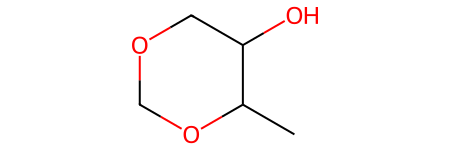

In [61]:
# Read the SMILES string




selfie_input = selfies.encoder('COC(=O)C1=CC=C(C=C1)O')

selfie_input = selfies.encoder('OC(=O)C1=CC=C(C=C1)O')

selfie_input = selfies.encoder('C(=O)C1=C(C=C1)')

selfie_input = selfies_list[12245]

molGood = Chem.MolFromSmiles(selfies.decoder(selfie_input))

display(molGood)




In [62]:
#create fingerprint generator
fpgen = rdFingerprintGenerator.GetRDKitFPGenerator(fpSize=64)

input molecule


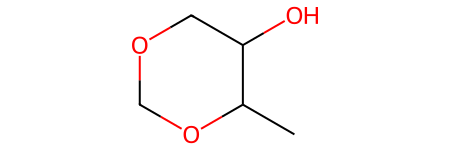




reconstructed molecule:


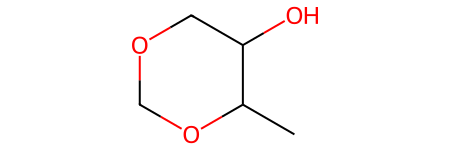

Similarity score 1.0


In [64]:
# number of drwas
trial_runs = 1

# Read the SMILES string
mol = selfies.decoder(selfie_input)
molDraw = Chem.MolFromSmiles(mol)
fps = fpgen.GetFingerprint(molDraw)

# Display the drawing
print("input molecule")
# Display the molecule
display(molDraw)
print("")
print("")
print("")

for i in range(trial_runs):
    coded_selfie_from_latent_space = af.decode_from_latentspace(vae_encoder, vae_decoder, create_latent_space_vector(selfie_input,largest_selfies_len,selfies_alphabet) , largest_selfies_len, len(selfies_alphabet),0) 
    selfie_from_latent_space = af.translate_selfie(coded_selfie_from_latent_space,selfies_alphabet)
    #if len(selfies.decoder(selfie_from_latent_space)) > len( selfies.decoder(selfie_input)) - 1 and len(selfies.decoder(selfie_from_latent_space)) < len( selfies.decoder(selfie_input)) + 1:
        # Read the SMILES string
    molGen = selfies.decoder(selfie_from_latent_space) 
        # Create a drawing of the molecule
    molDrawGen = Chem.MolFromSmiles(molGen)
     #Create a fingerprint of the generated molecule
    fpsGen = fpgen.GetFingerprint(molDrawGen)
        #Compute the Tanimoto similarity between input and reconstuction
    sim=DataStructs.TanimotoSimilarity(fps,fpsGen)
        # Display the drawing    
    print("reconstructed molecule:")
    display(molDrawGen)
        # display similarity score
    print("Similarity score", sim)
        


input molecule


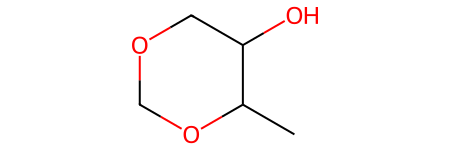




reconstructed molecule:


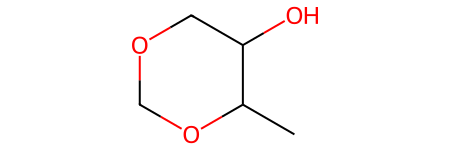

Similarity score 1.0
reconstructed molecule:


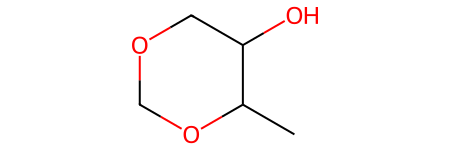

Similarity score 1.0
reconstructed molecule:


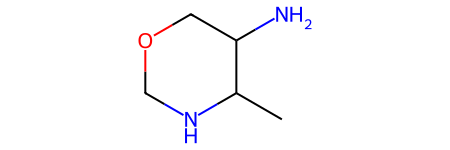

Similarity score 0.796875
reconstructed molecule:


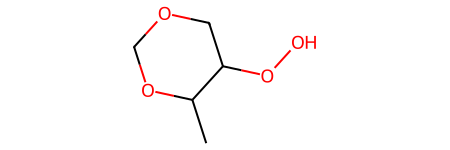

Similarity score 0.8688524590163934
reconstructed molecule:


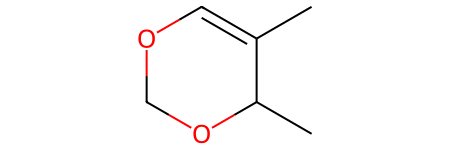

Similarity score 0.7936507936507936
reconstructed molecule:


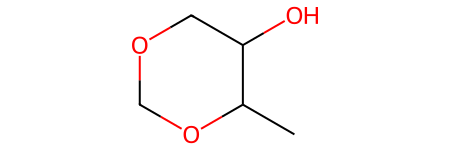

Similarity score 1.0
reconstructed molecule:


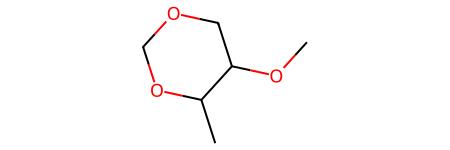

Similarity score 0.9814814814814815
reconstructed molecule:


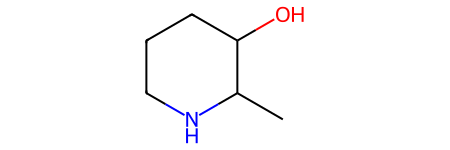

Similarity score 0.7096774193548387
reconstructed molecule:


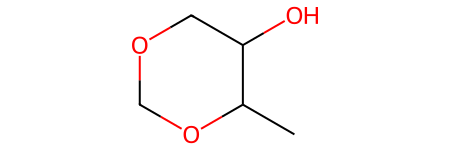

Similarity score 1.0
reconstructed molecule:


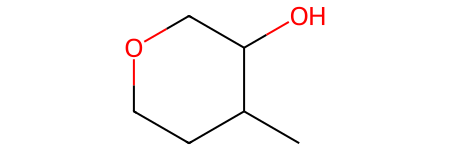

Similarity score 0.75
reconstructed molecule:


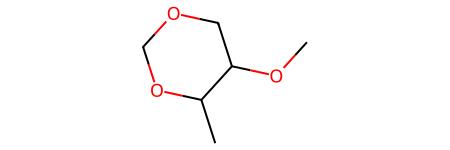

Similarity score 0.9814814814814815
reconstructed molecule:


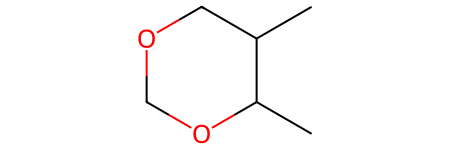

Similarity score 0.8392857142857143
reconstructed molecule:


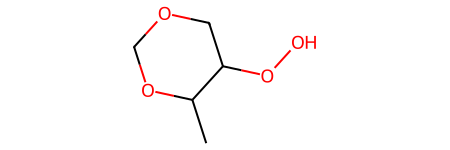

Similarity score 0.8688524590163934
reconstructed molecule:


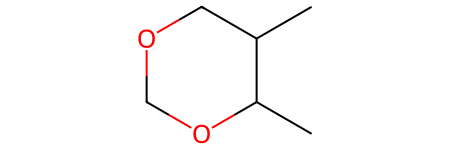

Similarity score 0.8392857142857143
reconstructed molecule:


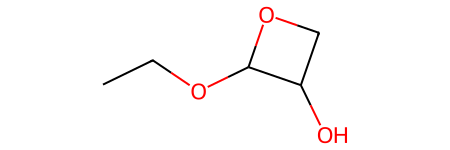

Similarity score 0.7627118644067796


In [65]:
# number of drwas
trial_runs = 15

# Read the SMILES string
mol = selfies.decoder(selfie_input)
molDraw = Chem.MolFromSmiles(mol)


# Display the drawing
print("input molecule")
display(molDraw)
print("")
print("")
print("")

for i in range(trial_runs):
    coded_selfie_from_latent_space = af.decode_from_latentspace(vae_encoder, vae_decoder, create_latent_space_vector(selfie_input,largest_selfies_len,selfies_alphabet) , largest_selfies_len, len(selfies_alphabet),1) 
    selfie_from_latent_space = af.translate_selfie(coded_selfie_from_latent_space,selfies_alphabet)
    #if len(selfies.decoder(selfie_from_latent_space)) > len( selfies.decoder(selfie_input)) - 1 and len(selfies.decoder(selfie_from_latent_space)) < len( selfies.decoder(selfie_input)) + 1:
        # Read the SMILES string
    molGen = selfies.decoder(selfie_from_latent_space) 
        # Create a drawing of the molecule
    molDrawGen = Chem.MolFromSmiles(molGen)
     #Create a fingerprint of the generated molecule
    fpsGen = fpgen.GetFingerprint(molDrawGen)
        #Compute the Tanimoto similarity between input and reconstuction
    sim=DataStructs.TanimotoSimilarity(fps,fpsGen)
        # Display the drawing    
    print("reconstructed molecule:")
    display(molDrawGen)
        # display similarity score
    print("Similarity score", sim)
    